# Detection des visages

Une fois le visage est détecté, nous nous intéressons à le reconnaître. Dans cette section nous supposons qu’ondispose d’images de visages (c.a.d la phase de détection a été déjà réalisée). L’objectif est de reconnaîtrel’identité de chaque visage. Nous allons explorer des approches classiques et des approches CNN

Pour cette partie voila la liste des site que l'on c'est inspiré pour la réalisation de ce projet:
- [Face Detection CNN](https://www.kaggle.com/code/nurcankurt/face-detection-cnn)
- [Détection de Masque Visage utilisant CNN (98% Précision)](https://www.kaggle.com/code/arbazkhan971/face-mask-detection-using-cnn-98-accuracy)
- [face-mask-detection CNN](https://www.kaggle.com/code/abdalrahmanshahrour/face-mask-detection-cnn/notebook)
- [Face detection using CNN with the LFW dataset](https://www.kaggle.com/code/jake126/face-detection-using-cnn-with-the-lfw-dataset)
- [Image Recognition - Gender Detection](https://www.kaggle.com/code/bmarcos/image-recognition-gender-detection-inceptionv3)
- [Face-Detection-Dataset](https://www.kaggle.com/datasets/fareselmenshawii/face-detection-dataset?resource=download-directory)

In [1]:
# bibliotheque utiliser pour les expressions regulieres
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import random
import seaborn as sns
import cv2

## Programme pour reconnaître un visage (ACP)

Ecrire un programme Python permettant de reconnaitre un visage en utilisant l’ACP


In [2]:
# Charger les données de visage LFW
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names

In [3]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Appliquer l'ACP pour réduire la dimensionnalité des données de visage
n_components = 150  # nombre de composantes principales
pca = PCA(n_components=n_components, whiten=True, random_state=42)
pca.fit(X_train)

PCA(n_components=150, random_state=42, whiten=True)

In [5]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Entraîner un classifieur sur les données réduites
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train_pca, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred = clf.predict(X_test_pca)

C:\Users\Nathan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Nathan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  F

                   precision    recall  f1-score   support

  Donald Rumsfeld       0.39      0.31      0.35        35
    George W Bush       0.74      0.89      0.81       164
Gerhard Schroeder       1.00      0.30      0.47        33
       Tony Blair       0.61      0.57      0.59        40

         accuracy                           0.70       272
        macro avg       0.69      0.52      0.55       272
     weighted avg       0.71      0.70      0.68       272

[[ 11  21   0   3]
 [ 12 146   0   6]
 [  2  15  10   6]
 [  3  14   0  23]]
(62, 47)


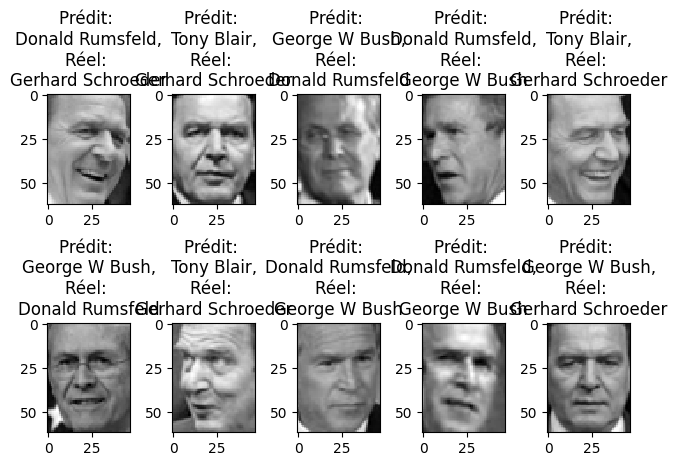

In [29]:
# Évaluer la performance du modèle
print(classification_report(y_test, y_pred, target_names=target_names))


print(confusion_matrix(y_test, y_pred))

# Afficher les 6 premieres images qui ont été mal classées
import matplotlib.pyplot as plt
import numpy as np

# Trouver les indices des prédictions incorrectes
incorrect_indices = np.where(y_pred != y_test)[0]

# Sélectionner les premiers indices incorrects
indices = 10
row = 2
col = indices // row
first_incorrect = incorrect_indices[:indices]

# Calculer la taille correcte pour le redimensionnement
image_size = lfw_dataset.images.shape[1:3]
print(image_size)

# Afficher les 6 premières images mal classées
for i, incorrect_index in enumerate(first_incorrect, start=1):
    plt.subplot(row, col, i)
    # Utiliser la taille calculée pour le redimensionnement
    plt.imshow(X_test[incorrect_index].reshape(image_size[0], image_size[1]), cmap='gray', interpolation='none')
    plt.title(f"Prédit: \n{target_names[y_pred[incorrect_index]]},\nRéel: \n{target_names[y_test[incorrect_index]]}")
    plt.tight_layout()

# Enregistrer le graphique sous le nom 'erreur.png'
plt.savefig('./out/ACP/analyse/erreur.png', bbox_inches='tight')
plt.show()

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Supposons que y_test et y_pred sont vos étiquettes réelles et prédites
# confusion_matrix = confusion_matrix(y_test, y_pred)

# Noms des classes pour les axes
class_names = ['Classe1', 'Classe2', 'Classe3']  # Remplacez par les vrais noms de vos classes

# Créer un heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Ajouter des titres et des étiquettes
plt.title('Matrice de Confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vérité')

# Afficher le graphique
plt.show()

ModuleNotFoundError: No module named 'seaborn'

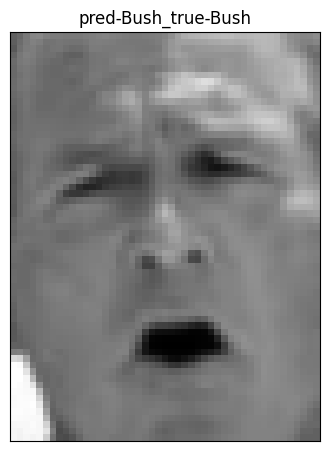

True

In [17]:
# Afficher un résultat de reconnaissance de visage
def plot_single_image(image, title, h, w):
    plt.figure(figsize=(4, 6))
    plt.imshow(image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(title, size=12)
    plt.xticks(())
    plt.yticks(())
    plt.show()

# Préparer le titre pour l'image prédite
def single_title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'pred-%s_true-%s' % (pred_name, true_name)

# Afficher une seule image avec son titre
h, w = lfw_dataset.images.shape[1:3]
i = random.randint(0, len(X_test) - 1)  # Choisir un index aléatoire
title = single_title(y_pred, y_test, target_names, i)
plot_single_image(X_test[i], title, h, w)

titleFile = single_title(y_pred, y_test, target_names, i)

# Convertir l'image de la plage [0, 1] à [0, 255] et changer le type en entier
image_to_save = (X_test[i].reshape((h, w)) * 255).astype('uint8')
cv2.imwrite(f'./out/ACP/{titleFile}.jpg', image_to_save)